In [89]:
#crop all the images stored in the image_log folder starting with name samples 
from PIL import Image
import os 

def crop_images():
    #get the list of all the images in the image_log folder
    images = os.listdir('image_log/train')
    #loop through the list of images
    for image in images:
        #check if the image name starts with samples and ends with .png
        if image.startswith('samples') and image.endswith('.png'):
            #open the image
            img = Image.open('image_log/train/' + image)
            #crop the image to 256x256
            img1 = img.crop((0,0,512,512))
            img2 = img.crop((516,0,1024,512))
            img3 = img.crop((1028, 0, 1536, 512))
            img4 = img.crop((1544, 2, 2048, 512))
            #save the cropped image in the image_log folder
            img1.save('image_log/train/e_crop_' + image[-10:-4] + '_1.png')
            img2.save('image_log/train/e_crop_' + image[-10:-4] + '_2.png')
            img3.save('image_log/train/e_crop_' + image[-10:-4] + '_3.png')
            img4.save('image_log/train/e_crop_' + image[-10:-4] + '_4.png')

#call the function to crop the images
crop_images()

In [ ]:
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('image_log/train/samples_cfg_scale_9.00_gs-000000_e-000000_b-000000.png')

# Display the image
fig, ax = plt.subplots()
ax.imshow(img)

# Define a function to handle mouse clicks
def onclick(event):
    x = int(event.xdata)
    y = int(event.ydata)
    print(f"Clicked on point ({x}, {y})")

# Connect the onclick function to the figure
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


In [38]:
#crop all the images stored in the image_log folder starting with name samples 
from PIL import Image
import os 

def crop_images():
    #get the list of all the images in the image_log folder
    images = os.listdir('image_log/train')
    #loop through the list of images
    for image in images:
        #check if the image name starts with samples and ends with .png
        if image.startswith('ground') and image.endswith('.png'):
            #open the image
            img = Image.open('image_log/train/' + image)
            #crop the image to 256x256
            img1 = img.crop((0,0,512,512))
            img2 = img.crop((516,0,1024,512))
            img3 = img.crop((1028, 0, 1536, 512))
            img4 = img.crop((1544, 2, 2048, 512))
            #save the cropped image in the image_log folder
            img1.save('image_log/train/oe_crop_' + image[-10:-4] + '_1.png')
            img2.save('image_log/train/oe_crop_' + image[-10:-4] + '_2.png')
            img3.save('image_log/train/oe_crop_' + image[-10:-4] + '_3.png')
            img4.save('image_log/train/oe_crop_' + image[-10:-4] + '_4.png')

#call the function to crop the images
crop_images()

In [ ]:

import lpips
import numpy as np
## Initializing the model
version = '0.1'
use_gpu = False

loss_fn = lpips.LPIPS(net='alex', version=version)
if use_gpu:
    loss_fn.cuda()

f = open('distances.txt', 'w')
# crawl directories
# dir_path = r'image_log/train'
dir_path = 'image_log/train/'


out_file = 'distances.txt'
all_pairs = False
N = None

f = open(out_file,'w')
files = os.listdir(dir_path)
if N is not None:
    files = files[:N]
F = len(files)

dists = []
import matplotlib.pyplot as plt

for (ff,file) in enumerate(files[:-1]):
    # o_crop_control_gs-018000_e-000000_b-018000_1.png
    # idx = int(file.split('_')[0])
    # file = f"{idx}_edited.jpg"
    # file1 = f"{idx}_original.jpg"
    #get the last 4 characters of the file name
    if file.startswith('e_crop'):
        file1_idx = file[-12:-4]
        # print(file1_idx)
        file = f"o_crop_{file1_idx}.png" 
        file1 = f"e_crop_{file1_idx}.png"
        
        # print(os.path.join(dir_path, file))
        # print(os.path.exists(os.path.join(dir_path, file)))
        #read the image with the file name from the image_log folder
        img0 = lpips.im2tensor(lpips.load_image(os.path.join(dir_path, file)))
        img1 = lpips.im2tensor(lpips.load_image(os.path.join(dir_path, file1)))

        if use_gpu:
            img0 = img0.cuda()

        if use_gpu:
            img1 = img1.cuda()

        # Compute distance
        dist01 = loss_fn.forward(img0,img1)
        print('(%s,%s): %.3f'%(file,file1,dist01))
        f.writelines('(%s,%s): %.6f\n'%(file,file1,dist01))

        dists.append(dist01.item())

avg_dist = np.mean(np.array(dists))
stderr_dist = np.std(np.array(dists))/np.sqrt(len(dists))

print('Avg: %.5f +/- %.5f'%(avg_dist,stderr_dist))
f.writelines('Avg: %.6f +/- %.6f'%(avg_dist,stderr_dist))

f.close()


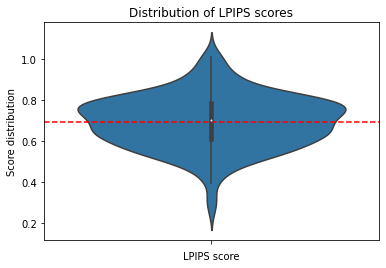

In [101]:
import seaborn as sns

# Load LPIPS scores from file
scores_file = 'distances.txt'
with open(scores_file, 'r') as f:
    lines = f.readlines()
    scores = [float(line.split(': ')[-1]) for line in lines[:-1]]  # Exclude last line

# Create violin plot
sns.violinplot(y=scores)

# Add average line
avg_score = sum(scores) / len(scores)
plt.axhline(y=avg_score, color='r', linestyle='--')

# Set labels and title
plt.xlabel('LPIPS score')
plt.ylabel('Score distribution')
plt.title('Distribution of LPIPS scores')

# Show plot
plt.show()


In [2]:
#Frechet Inception Distance (FID) score

import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize
from keras.datasets.mnist import load_data

In [3]:
# scale an array of images to a new size
def scale_images(images, new_shape):
      images_list = list()
      for image in images:
         # resize with nearest neighbor interpolation
         # print(image.shape[0])
         # print(new_shape)
         # print (image)
         new_image = resize(image, new_shape, 0)
         # store
         images_list.append(new_image)
      return asarray(images_list)

# img1 = Image.open(os.path.join(dir_path, file))
# img2 = Image.open(os.path.join(dir_path, file1))

# images1 = asarray(img1)
# images2 = asarray(img2)
# images1 = scale_images(images1, (299,299,3))
# images2 = scale_images(images2, (299,299,3))

# print('Prepared', images1.shape, images2.shape)

In [4]:
import numpy as np
from numpy import asarray
from PIL import Image
from skimage.transform import resize
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 print(images1.shape, images2.shape)
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 print(sigma1.shape, sigma2.shape)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))

 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
    covmean = covmean.real
 # calculate score
 fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
 return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

In [39]:
#FID for two individual images


# import numpy as np
from numpy import asarray
from PIL import Image
from skimage.transform import resize
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
 # calculate activations
 print(images1.shape, images2.shape)
 act1 = model.predict(images1)
 act2 = model.predict(images2)
 # calculate mean and covariance statistics
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 # calculate sum squared difference between means
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 print(sigma1.shape, sigma2.shape)
 # calculate sqrt of product between cov
 covmean = sqrtm(sigma1.dot(sigma2))

 # check and correct imaginary numbers from sqrt
 if iscomplexobj(covmean):
    covmean = covmean.real
 # calculate score
 fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
 return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# get two images 
#get images from the image_log folder
dir_path = 'image_log/train/'
file = 'oe_crop_000000_1.png'
file1 = 'e_crop_000000_1.png'


img1 = Image.open(os.path.join(dir_path, file))
img2 = Image.open(os.path.join(dir_path, file1))

images1 = asarray(img1)
images2 = asarray(img2)

print('Loaded', images1.shape, images2.shape)

# shuffle(images1)
# images1 = images1[:10000]
# print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images1 to (170, 299, 299, 3) using the first dimension of the images1  
# images1 = resize(images1, (images1.shape[0], 299,299,3), 0)
# images2 = resize(images2, (images2.shape[0], 299,299,3), 0)
# resize images to the new size
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))

print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)

print('FID: %.3f' % fid)

Loaded (512, 512, 3) (512, 512, 3)
Scaled (512, 299, 299, 3) (512, 299, 299, 3)
(512, 299, 299, 3) (512, 299, 299, 3)
(2048, 2048) (2048, 2048)
FID: 111.198


In [ ]:
#FID for the entire dataset

f = open('fid.txt', 'w')
# crawl directories
# dir_path = r'image_log/train'
dir_path = 'image_log/train/'


out_file = 'fid.txt'
all_pairs = False
N = None

f = open(out_file,'w')
files = os.listdir(dir_path)
if N is not None:
    files = files[:N]
F = len(files)

dists = []
import matplotlib.pyplot as plt

use_gpu = False
#run it for 5 images only
count = 0
for (ff, file) in enumerate(files[:-1]):
    # o_crop_control_gs-018000_e-000000_b-018000_1.png
    # idx = int(file.split('_')[0])
    # file = f"{idx}_edited.jpg"
    # file1 = f"{idx}_original.jpg"
    #get the last 4 characters of the file name
    # print(ff, file)
    if count == 20:
        break
    if file.startswith('e_crop'):

        count += 1
        file1_idx = file[-12:-4]
        # print(file1_idx)
        file = f"oe_crop_{file1_idx}.png" 
        file1 = f"e_crop_{file1_idx}.png"
        
        # print(os.path.join(dir_path, file))
        # print(os.path.exists(os.path.join(dir_path, file)))
        #read the image with the file name from the image_log folder
        img1 = Image.open(os.path.join(dir_path, file))
        img2 = Image.open(os.path.join(dir_path, file1))

        images1 = asarray(img1)
        images2 = asarray(img2)

        # print('Loaded', images1.shape, images2.shape)
        # convert integer to floating point values
        images1 = images1.astype('float32')
        images2 = images2.astype('float32')
        # resize images1 to (170, 299, 299, 3) using the first dimension of the images1  
       
        # resize images to the new size
        images1 = scale_images(images1, (299,299,3))
        images2 = scale_images(images2, (299,299,3))

        # print('Scaled', images1.shape, images2.shape)
        # pre-process images
        images1 = preprocess_input(images1)
        images2 = preprocess_input(images2)
        

        # if use_gpu:
        #     img2 = img2.cuda()

        # if use_gpu:
        #     img1 = img1.cuda()

        # Compute distance
        # calculate fid
        fid = calculate_fid(model, images1, images2)
        print('(%s,%s): %.3f'%(file,file1,fid))
        f.writelines('(%s,%s): %.6f\n'%(file,file1,fid))
        f.flush()
        dists.append(fid.item())

avg_dist = np.mean(np.array(dists))
stderr_dist = np.std(np.array(dists))/np.sqrt(len(dists))

print('Avg: %.5f +/- %.5f'%(avg_dist,stderr_dist))
f.writelines('Avg: %.6f +/- %.6f'%(avg_dist,stderr_dist))

f.close()

[75.505605, 78.550886, 85.127149, 103.772835, 79.481965, 87.686129, 52.789723, 180.751902, 68.712397, 49.51991, 80.930771, 118.553457, 136.475793, 105.916251, 125.097007, 119.640237, 150.784035, 142.841056, 79.319516, 130.239304, 76.836805, 62.801413, 60.810013, 57.030836, 94.883423, 86.818015, 111.772701, 157.570786, 85.399189, 77.042139, 36.677418, 67.867119, 75.418129, 96.344729, 54.061214, 192.181718, 77.602562, 79.692006, 209.789578, 91.552255, 172.445914, 72.181845, 117.566979, 37.804352, 87.614397, 131.289548, 65.69254, 44.382892, 76.640448, 153.44535, 145.219905, 128.435329, 74.951275, 105.576553, 128.594944, 288.606819, 62.812391, 68.843371, 68.172702, 149.140611, 58.396433, 119.392394, 181.742556, 62.316814, 93.703398, 147.397051, 66.507893, 47.520106, 87.386735, 106.483254]


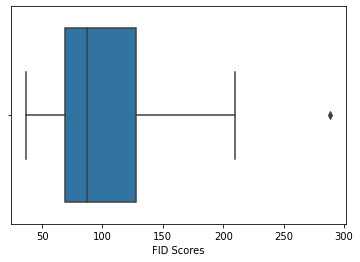

87.102375


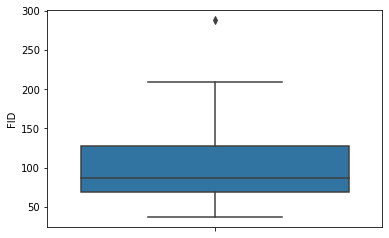

Avg: 100.77304 +/- 5.40617


In [34]:
#make a horizontal box plot to show the distribution of the FID scores using seaborn library
import seaborn as sns
import pandas as pd
#read the data from the fid.txt file and plot it
fid_data = []
with open('fid.txt') as f:
    for line in f:
        fid_data.append(float(line.split(':')[-1]))

print(fid_data)
# plt.boxplot(fid_data)
# plt.show()
df = pd.DataFrame(fid_data, columns=['FID'])
sns.boxplot(x='FID', data=df, orient='h', )
plt.xlabel('FID Scores')
plt.show()

#get the median of the FID scores
import numpy as np
print(np.median(np.array(fid_data)))
#make a vertical box plot 
sns.boxplot(y='FID', data=df)
plt.show()

avg_dist = np.mean(np.array(fid_data))
stderr_dist = np.std(np.array(fid_data))/np.sqrt(len(fid_data))

print('Avg: %.5f +/- %.5f'%(avg_dist,stderr_dist))

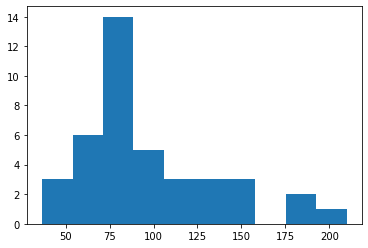

In [7]:
# # plot the distribution of the FID scores in a histogram 

plt.hist(fid_data)
plt.show()

[75.505605, 78.550886, 85.127149, 103.772835, 79.481965, 87.686129, 52.789723, 180.751902, 68.712397, 49.51991, 80.930771, 118.553457, 136.475793, 105.916251, 125.097007, 119.640237, 150.784035, 142.841056, 79.319516, 130.239304, 76.836805, 62.801413, 60.810013, 57.030836, 94.883423, 86.818015, 111.772701, 157.570786, 85.399189, 77.042139, 36.677418, 67.867119, 75.418129, 96.344729, 54.061214, 192.181718, 77.602562, 79.692006, 209.789578, 91.552255]


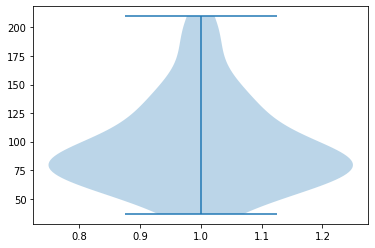

In [12]:
# make a violin plot to show the distribution of the FID scores
import matplotlib.pyplot as plt
#read the data from the fid.txt file and plot it
fid_data = []
with open('fid.txt') as f:
    for line in f:
        fid_data.append(float(line.split(':')[-1]))

print(fid_data)
plt.violinplot(fid_data)
plt.show()

